<a href="https://colab.research.google.com/github/rahmashintav/USAHousePrice-Prediction/blob/main/USAHousePrice-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

import os
import zipfile

# Buat direktori dan salin file API
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Set permission
!chmod 600 /root/.kaggle/kaggle.json

# Download dataset dari fratzcan
!kaggle datasets download -d fratzcan/usa-house-prices

with zipfile.ZipFile("usa-house-prices.zip", 'r') as zip_ref:
    zip_ref.extractall("usa_house_prices")

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/fratzcan/usa-house-prices
License(s): apache-2.0
usa-house-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#1 Menampilkan Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("usa_house_prices/USA Housing Dataset.csv")
print("Ukuran awal dataset:", df.shape)
df.head()

Ukuran awal dataset: (4140, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0,9245-9249 Fremont Ave N,Seattle,WA 98103,USA
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0,33001 NE 24th St,Carnation,WA 98014,USA
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0,820 NW 95th St,Seattle,WA 98117,USA
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0,10834 31st Ave SW,Seattle,WA 98146,USA


In [4]:
# Cek info umum data
print("Info Umum Data:")
df.info()

# Cek statistik ringkasan
print("Statistik Ringkasan:")
columns_to_keep = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement'
]
df_clean = df.dropna()
df_selected = df_clean[columns_to_keep]
df_selected.describe()

Info Umum Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4140 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   float64
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   int64  
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  street         4140 non-null   object 
 15  city           4140 non-null   object 
 16  statezip       4140 non-null   object 
 17  country        4140 non-null   objec

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement
count,4.140000e+03,4140.000000,4140.000000,4140.000000,4.140000e+03,4140.000000,4140.000000,4140.000000,4140.000000
mean,5.530629e+05,3.400483,2.163043,2143.638889,1.469764e+04,1.514130,3.452415,1831.351449,312.287440
std,5.836865e+05,0.903939,0.784733,957.481621,3.587684e+04,0.534941,0.678533,861.382947,464.349222
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,1.000000,370.000000,0.000000
25%,3.200000e+05,3.000000,1.750000,1470.000000,5.000000e+03,1.000000,3.000000,1190.000000,0.000000
50%,4.600000e+05,3.000000,2.250000,1980.000000,7.676000e+03,1.500000,3.000000,1600.000000,0.000000
75%,6.591250e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,4.000000,2310.000000,602.500000
max,2.659000e+07,8.000000,6.750000,10040.000000,1.074218e+06,3.500000,5.000000,8020.000000,4820.000000


In [5]:
#2 Data Cleaning

df_initial_clean = df.copy()
df_clean = df_initial_clean.copy()

# Cek missing values
print("Missing Values per Kolom:")
print(df.isnull().sum())

Missing Values per Kolom:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [6]:
# Cek duplikasi
print("Jumlah Duplikat:", df_clean.duplicated().sum())

Jumlah Duplikat: 0


In [7]:
# Cek inkonsistensi data
categorical_columns = df_clean.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\n📌 Nilai Unik di Kolom '{col}':")
    print(df_clean[col].value_counts(dropna=False))


📌 Nilai Unik di Kolom 'date':
date
2014-06-23 00:00:00    142
2014-06-25 00:00:00    131
2014-06-26 00:00:00    131
2014-07-08 00:00:00    127
2014-07-09 00:00:00    121
                      ... 
2014-05-02 00:00:00      3
2014-07-06 00:00:00      3
2014-05-11 00:00:00      2
2014-07-04 00:00:00      2
2014-05-17 00:00:00      1
Name: count, Length: 68, dtype: int64

📌 Nilai Unik di Kolom 'street':
street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
22840 SE 269th St        2
6520-6588 8th Ave NW     2
3510 S Holly St          2
                        ..
9007 4th Ave NW          1
21924 234th Ave SE       1
4612 92nd Ave NE         1
2825 W Elmore Pl         1
8314 361st Ave NE        1
Name: count, Length: 4079, dtype: int64

📌 Nilai Unik di Kolom 'city':
city
Seattle               1415
Renton                 261
Bellevue               260
Redmond                209
Kent                   167
Kirkland               166
Issaquah               162
Auburn                 162


In [8]:
# Convert date column
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Drop non-informative street column
df_clean.drop(columns='street', inplace=True)

# Split statezip, drop redundant
df_clean[['state', 'zipcode']] = df_clean['statezip'].str.split(' ', expand=True)
df_clean.drop(columns='statezip', inplace=True)
if df_clean['state'].nunique() == 1:
    df_clean.drop(columns='state', inplace=True)
df_clean['zipcode'] = pd.to_numeric(df_clean['zipcode'])

# Drop non-informative country column
df_clean.drop(columns='country', inplace=True)

In [9]:
# Cek nilai yang tidak logis
print("Nilai yang Tidak Logis:")
for col in df_clean.select_dtypes(include=np.number).columns:
    print(f"{col}: Min = {df_clean[col].min()}, Max = {df_clean[col].max()}")

Nilai yang Tidak Logis:
price: Min = 0.0, Max = 26590000.0
bedrooms: Min = 0.0, Max = 8.0
bathrooms: Min = 0.0, Max = 6.75
sqft_living: Min = 370, Max = 10040
sqft_lot: Min = 638, Max = 1074218
floors: Min = 1.0, Max = 3.5
waterfront: Min = 0, Max = 1
view: Min = 0, Max = 4
condition: Min = 1, Max = 5
sqft_above: Min = 370, Max = 8020
sqft_basement: Min = 0, Max = 4820
yr_built: Min = 1900, Max = 2014
yr_renovated: Min = 0, Max = 2014
zipcode: Min = 98001, Max = 98354


In [10]:
# Hapus rumah dengan harga 0
df_clean = df_clean[df_clean['price'] > 0]

# Hapus rumah tanpa kamar tidur atau kamar mandi
df_clean = df_clean[(df_clean['bedrooms'] > 0) & (df_clean['bathrooms'] > 0)]

# Hapus outlier ekstrem untuk ukuran lot (top 1%)
q_high_lot = df_clean['sqft_lot'].quantile(0.99)
df_clean = df_clean[df_clean['sqft_lot'] <= q_high_lot]

# Reset index setelah filtering
df_clean.reset_index(drop=True, inplace=True)

# Cek data akhir
print("Dataset setelah Cleaning:")
df_clean[columns_to_keep].describe()

Dataset setelah Cleaning:


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement
count,4.048000e+03,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000,4048.000000
mean,5.585233e+05,3.392787,2.153718,2125.996047,11946.830781,1.512722,3.450346,1816.171443,309.824605
std,5.861573e+05,0.894133,0.771754,937.828923,18168.988314,0.535171,0.676847,841.627234,460.691175
min,7.800000e+03,1.000000,0.750000,370.000000,638.000000,1.000000,1.000000,370.000000,0.000000
25%,3.250000e+05,3.000000,1.750000,1460.000000,5000.000000,1.000000,3.000000,1180.000000,0.000000
50%,4.615000e+05,3.000000,2.250000,1970.000000,7616.000000,1.500000,3.000000,1590.000000,0.000000
75%,6.600000e+05,4.000000,2.500000,2610.000000,10800.000000,2.000000,4.000000,2300.000000,600.000000
max,2.659000e+07,8.000000,6.750000,10040.000000,206474.000000,3.500000,5.000000,7680.000000,4820.000000


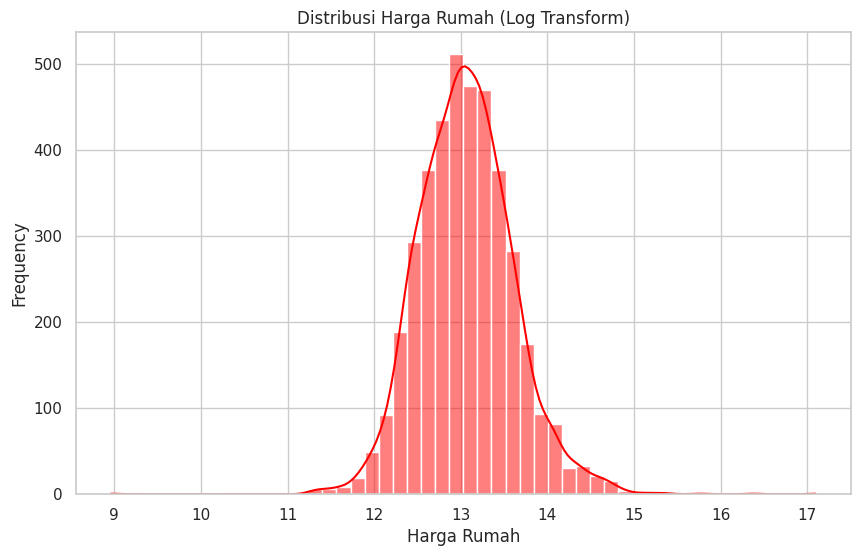

In [11]:
#3 Exploratory Data Analysis (EDA)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Buat kolom baru dengan log-transform dari harga
df_clean['log_price'] = np.log1p(df_clean['price'])  # log(1 + price) agar tidak error saat harga = 0

# Visualisasi distribusi harga rumah setelah log transform
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['log_price'], kde=True, bins=50, color='red')
plt.title("Distribusi Harga Rumah (Log Transform)")
plt.xlabel("Harga Rumah")
plt.ylabel("Frequency")
plt.show()

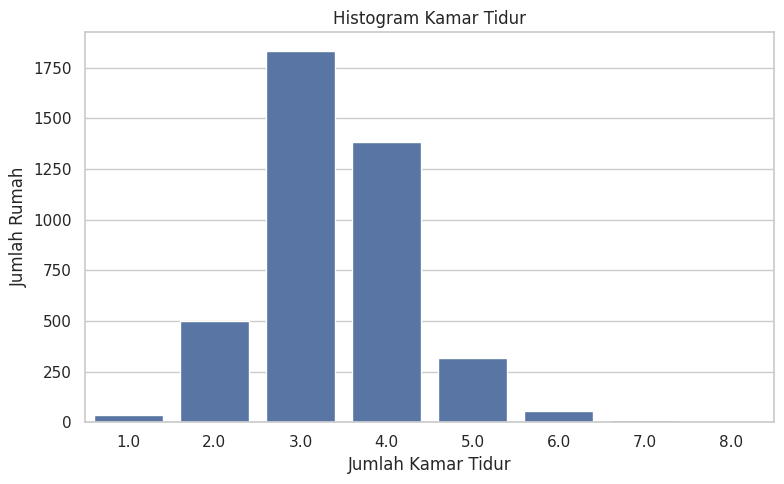

In [12]:
df_bed_filtered = df[(df['bedrooms'] >= 1) & (df['bedrooms'] <= 10)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_bed_filtered, x='bedrooms', order=sorted(df_bed_filtered['bedrooms'].unique()))
plt.title("Histogram Kamar Tidur")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

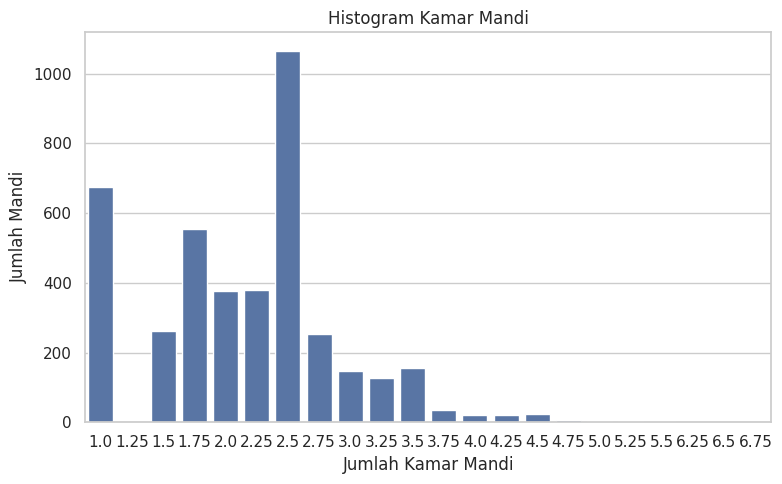

In [13]:
df_bath_filtered = df[(df['bathrooms'] >= 1) & (df['bathrooms'] <= 10)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_bath_filtered, x='bathrooms', order=sorted(df_bath_filtered['bathrooms'].unique()))
plt.title("Histogram Kamar Mandi")
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("Jumlah Mandi")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

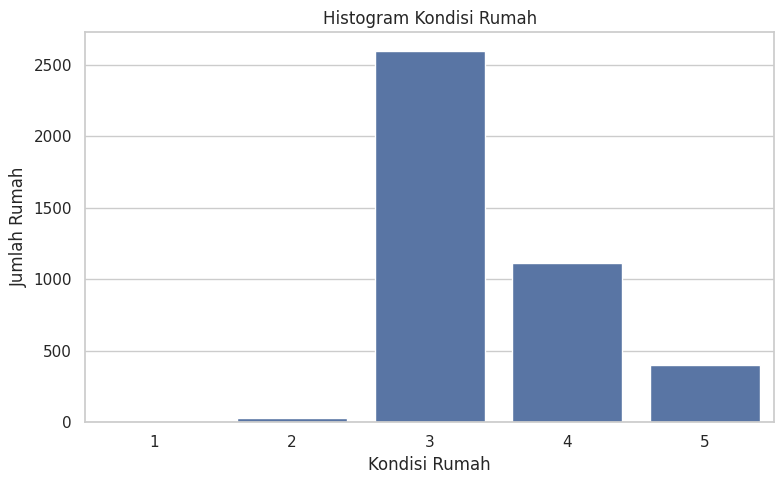

In [14]:
df_con_filtered = df[(df['condition'] >= 1) & (df['condition'] <= 10)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_con_filtered, x='condition', order=sorted(df_con_filtered['condition'].unique()))
plt.title("Histogram Kondisi Rumah")
plt.xlabel("Kondisi Rumah")
plt.ylabel("Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

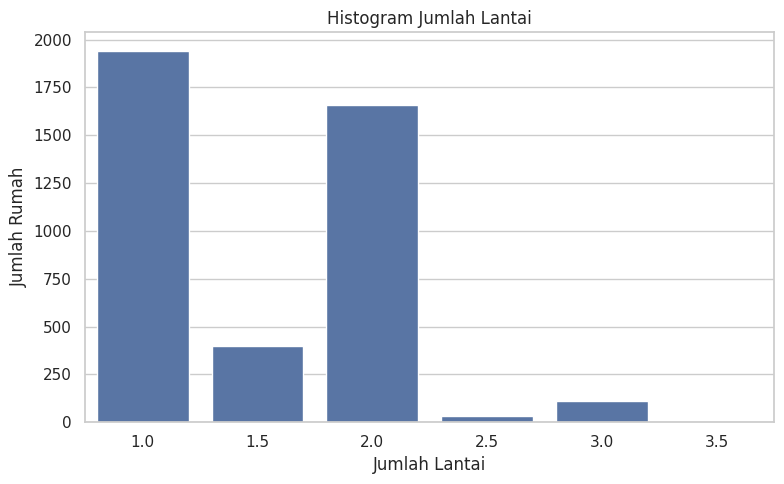

In [15]:
df_flo_filtered = df[(df['floors'] >= 1) & (df['floors'] <= 10)]

plt.figure(figsize=(8, 5))
sns.countplot(data=df_flo_filtered, x='floors', order=sorted(df_flo_filtered['floors'].unique()))
plt.title("Histogram Jumlah Lantai")
plt.xlabel("Jumlah Lantai")
plt.ylabel("Jumlah Rumah")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

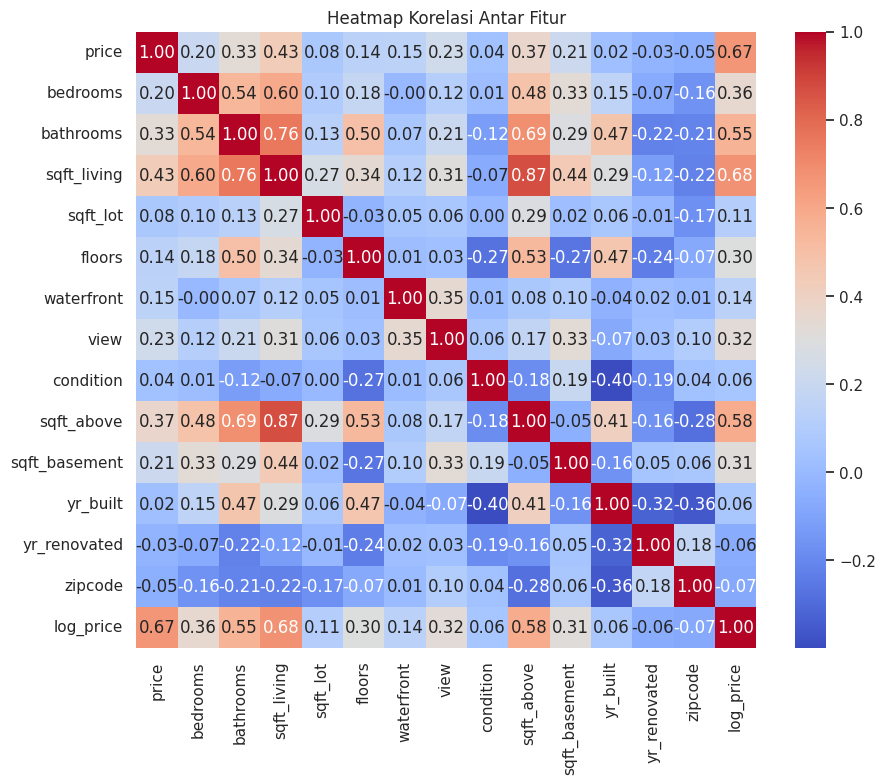

In [16]:
# Hitung korelasi
corr_matrix = df_clean.corr(numeric_only=True)

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

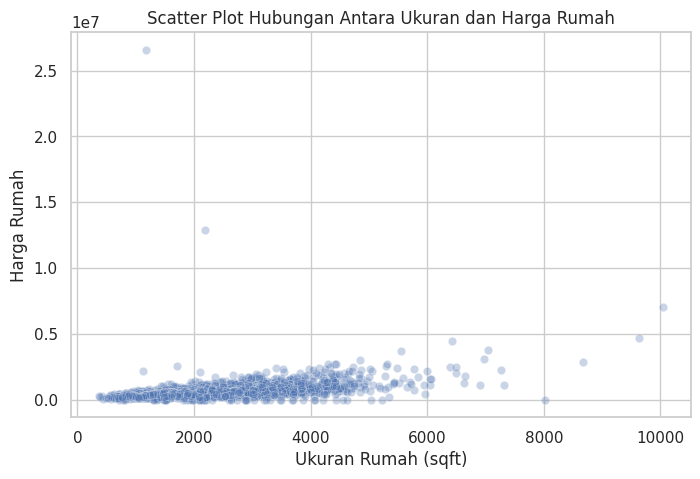

In [17]:
# Scatter plot untuk hubungan antara ukuran dan harga rumah
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.3)
plt.title("Scatter Plot Hubungan Antara Ukuran dan Harga Rumah")
plt.xlabel("Ukuran Rumah (sqft)")
plt.ylabel("Harga Rumah")
plt.show()

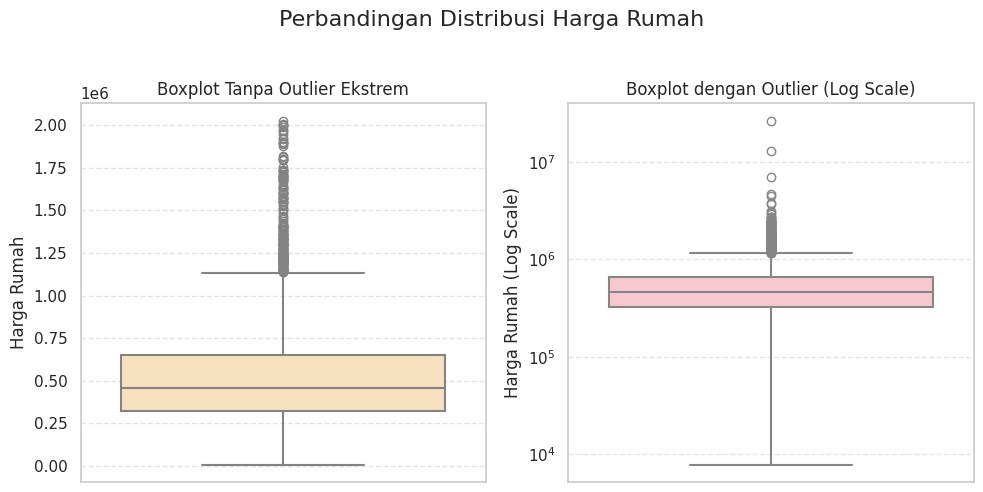

In [18]:
# Boxplot harga rumah
# Filter data tanpa outlier
q99 = df_clean['price'].quantile(0.99)
df_filtered = df_clean[df_clean['price'] <= q99]

# Buat 2 subplots berdampingan
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot tanpa outlier (Top 1% dihapus)
sns.boxplot(y=df_filtered['price'], ax=axes[0], color='moccasin', linewidth=1.5)
axes[0].set_title("Boxplot Tanpa Outlier Ekstrem")
axes[0].set_ylabel("Harga Rumah")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Boxplot dengan outlier tapi log scale
sns.boxplot(y=df_clean['price'], ax=axes[1], color='pink', linewidth=1.5)
axes[1].set_yscale('log')  # Gunakan skala log
axes[1].set_title("Boxplot dengan Outlier (Log Scale)")
axes[1].set_ylabel("Harga Rumah (Log Scale)")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.suptitle("Perbandingan Distribusi Harga Rumah", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

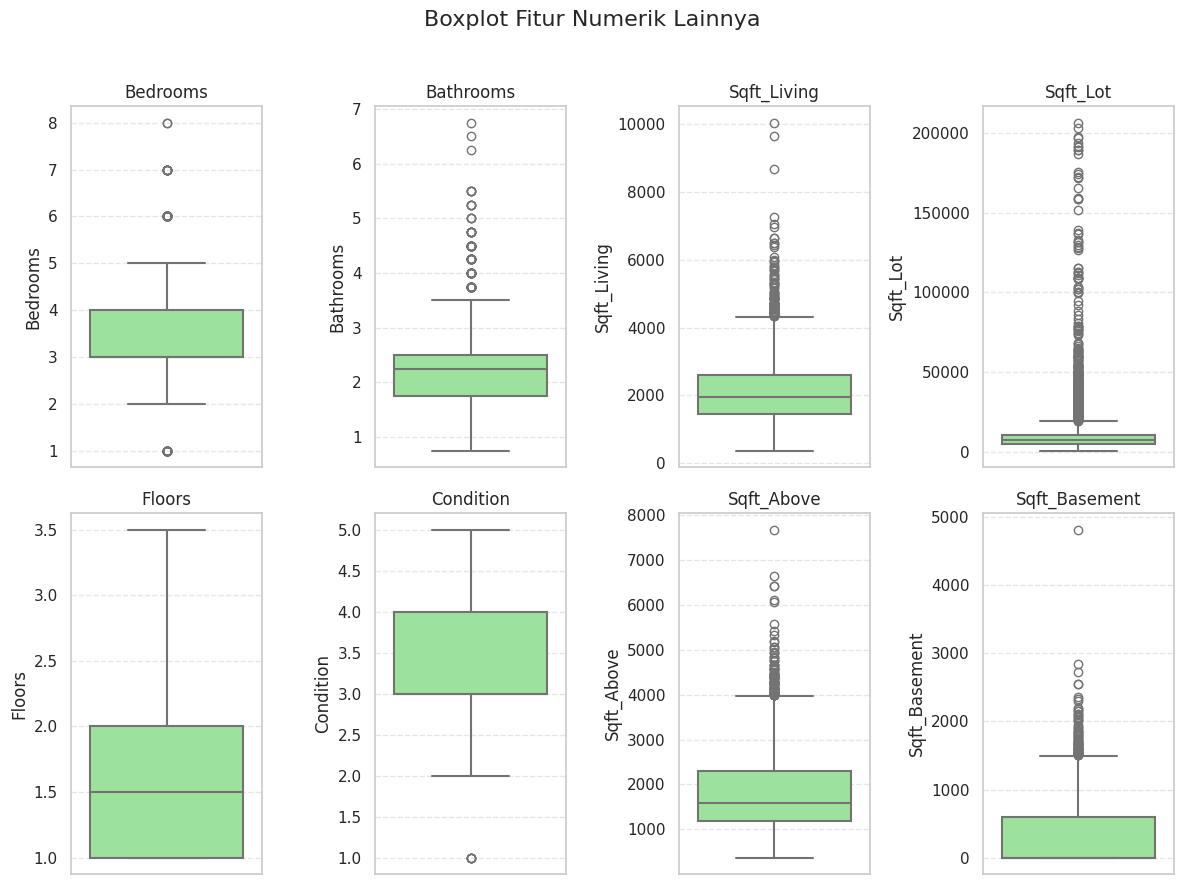

In [19]:
# Daftar fitur lain yang akan diplot
features = ['bedrooms', 'bathrooms', 'sqft_living',
            'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement']

# Buat subplots 3 baris × 3 kolom
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 9))
fig.suptitle("Boxplot Fitur Numerik Lainnya", fontsize=16)

# Flatten axes agar bisa loop
axes = axes.flatten()

# Boxplot untuk masing-masing fitur
for i, feature in enumerate(features):
    sns.boxplot(y=df_clean[feature], ax=axes[i], color='lightgreen', linewidth=1.5)
    axes[i].set_title(f"{feature.title()}", fontsize=12)
    axes[i].set_ylabel(feature.title())
    axes[i].set_xlabel("")
    axes[i].grid(axis='y', linestyle='--', alpha=0.5)

# Hapus subplot kosong jika jumlah fitur < 9
for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # sisakan ruang untuk judul utama
plt.show()

In [20]:
#4 Feature Engineering

df_fe = df_clean.copy()

# Harga per kaki persegi
df_fe['price_per_sqft'] = df_fe['price'] / df_fe['sqft_living']

# Usia rumah
df_fe['house_age'] = 2015 - df_fe['yr_built']  # 2015 karena semua data tahun 2014-2015

# Apakah rumah pernah direnovasi?
df_fe['is_renovated'] = df_fe['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

# Berapa lama sejak renovasi terakhir?
df_fe['renovation_age'] = df_fe.apply(
    lambda row: 2015 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0,
    axis=1
)

# Jumlah total ruang utama
df_fe['total_rooms'] = df_fe['bedrooms'] + df_fe['bathrooms']

# Proporsi lantai dasar terhadap total luas
df_fe['sqft_ratio'] = df_fe['sqft_above'] / df_fe['sqft_living']

# Kategorisasi neighborhood
# Ambil 10 kode pos dengan penjualan terbanyak
top_zipcodes = df_fe['zipcode'].value_counts().nlargest(10).index
# Buat kategori 'top_zipcode' vs 'other'
df_fe['zip_group'] = df_fe['zipcode'].apply(lambda x: str(x) if x in top_zipcodes else 'Other')

# Ambil 10 kota dengan jumlah rumah terbanyak
top_cities = df_fe['city'].value_counts().head(10).index.tolist()
# Buat kategori 'top_city' vs 'other'
df_fe['city_group'] = df_fe['city'].apply(lambda x: str(x) if x in top_cities else 'Other')

df_model = df_fe.drop(columns=[
    'street', 'city', 'statezip', 'country', 'date', 'yr_built', 'yr_renovated', 'zipcode'
], errors='ignore')

df_model.head(20)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,log_price,price_per_sqft,house_age,is_renovated,renovation_age,total_rooms,sqft_ratio,zip_group,city_group
0,376000.0,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,12.837347,280.597015,7,0,0,5.00,1.000000,98103,Seattle
1,800000.0,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,13.592368,225.988701,8,0,0,7.25,1.000000,Other,Other
2,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,14.621490,307.962586,5,0,0,11.50,0.883081,Other,Issaquah
3,324000.0,3.0,2.25,998,904,2.0,0,0,3,798,200,12.688502,324.649299,8,0,0,5.25,0.799599,98117,Seattle
4,549900.0,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,13.217494,179.705882,36,0,0,7.75,0.522876,Other,Seattle
5,320000.0,3.0,2.50,2130,6969,2.0,0,0,3,2130,0,12.676079,150.234742,12,0,0,5.50,1.000000,98038,Other
6,875000.0,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,13.681980,347.222222,94,1,8,6.00,0.555556,98103,Seattle
7,265000.0,4.0,1.00,1940,9533,1.0,0,0,3,1080,860,12.487489,136.597938,53,1,12,5.00,0.556701,Other,Kent
8,394950.0,3.0,2.50,1350,1250,3.0,0,0,3,1270,80,12.886517,292.555556,9,0,0,5.50,0.940741,Other,Seattle
9,842500.0,4.0,2.50,2160,5298,2.5,0,0,4,2160,0,13.644130,390.046296,113,0,0,6.50,1.000000,Other,Seattle


In [21]:
#5 Model Selection
# Fokus pada pemilihan algoritma berdasarkan karakteristik data

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

print("\n Model yang Akan Digunakan:")
for name, model in models.items():
    print(f"- {name}")

print("\n Alasan Pemilihan Model:")
print("- Linear Regression: Untuk mengukur hubungan linier antara variabel numerik.")
print("- Decision Tree: Menangani relasi non-linear dan robust terhadap skala.")
print("- Random Forest: Ensembel dari Decision Tree sehingga lebih stabil dan akurat.")
print("- Gradient Boosting: Cocok untuk prediksi kompleks dengan fine-tuning akurasi tinggi.")



 Model yang Akan Digunakan:
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting

 Alasan Pemilihan Model:
- Linear Regression: Untuk mengukur hubungan linier antara variabel numerik.
- Decision Tree: Menangani relasi non-linear dan robust terhadap skala.
- Random Forest: Ensembel dari Decision Tree sehingga lebih stabil dan akurat.
- Gradient Boosting: Cocok untuk prediksi kompleks dengan fine-tuning akurasi tinggi.


In [22]:
#6 Model Training and Evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Pilih fitur yang akan digunakan
features = ['sqft_living', 'bedrooms', 'bathrooms', 'price_per_sqft', 'house_age', 'total_rooms']
target = 'price'

# Pisahkan data menjadi fitur (X) dan target (y)
X = df_fe[features]
y = df_fe[target]

# Split data ke train dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 4)
    })

results_df = pd.DataFrame(results).sort_values(by='RMSE')
print("\n Hasil Evaluasi Model:")
display(results_df)


 Hasil Evaluasi Model:


,Model,MAE,MSE,RMSE,R² Score
3,Gradient Boosting,18156.16,8.235634e+08,28697.80,0.9936
2,Random Forest,8747.83,2.695603e+09,51919.20,0.9792
1,Decision Tree,20509.15,4.805070e+09,69318.61,0.9628
0,Linear Regression,83232.85,2.065547e+10,143720.10,0.8403


In [24]:
#5 Model Selection (Log)

# Import library
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Target: log(price) agar distribusi normal
df_model['log_price'] = np.log1p(df_model['price'])

# Fitur & target
X = df_model.drop(columns=['price', 'log_price'])  # Semua fitur
y = df_model['log_price']  # Target = log(price)

# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deteksi kolom kategorikal untuk one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Pipeline preprocessing (hanya encode kolom kategorikal)
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')  # Kolom numerik dilewatkan

# Daftar model yang akan dicoba
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42, n_estimators=100)
}

# Training dan evaluasi model
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluasi model dalam skala log
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE (log)': rmse,
        'MAE (log)': mae,
        'R2 Score': r2
    })

# Tampilkan hasil
results_dflog = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
display(results_dflog)

,Model,RMSE (log),MAE (log),R2 Score
3,Gradient Boosting,0.037800,0.025766,0.995187
2,Random Forest,0.060247,0.017475,0.987774
1,Decision Tree,0.072323,0.037718,0.982381
0,Linear Regression,0.267499,0.190929,0.758974


In [25]:
!pip install lightgbm xgboost
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

df_modelt = df_fe.copy()
df_modelt = pd.get_dummies(df_modelt, columns=['zip_group', 'city_group'], drop_first=True)

# Tentukan fitur dan target
features = ['sqft_living', 'bedrooms', 'bathrooms', 'price_per_sqft', 'house_age', 'total_rooms'] + \
           [col for col in df_modelt.columns if 'zip_group_' in col or 'city_group_' in col]
target = 'price'

# Split data
X = df_modelt[features]
y = df_modelt[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model XGBoost
xgb = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluasi XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Model LightGBM
lgb = LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42)
lgb.fit(X_train, y_train)
y_pred_lgb = lgb.predict(X_test)

# Evaluasi LightGBM
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

results = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'RMSE': [rmse_xgb, rmse_lgb],
    'MAE': [mae_xgb, mae_lgb],
    'R2 Score': [r2_xgb, r2_lgb]
})

results['RMSE'] = results['RMSE'].apply(lambda x: round(x, 2))
results['MAE'] = results['MAE'].apply(lambda x: round(x, 2))
results['R2 Score'] = results['R2 Score'].apply(lambda x: round(x, 4))

print("Hasil Evaluasi Model Tambahan:")
print(results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 730
[LightGBM] [Info] Number of data points in the train set: 3238, number of used features: 26
[LightGBM] [Info] Start training from score 559998.115120
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [26]:
#7 Hyperparameter Tuning
# Model Gradient Boosting
# Grid Search

from sklearn.model_selection import train_test_split, GridSearchCV

# Inisialisasi model dasar
gbr = GradientBoostingRegressor(random_state=42)

# Grid parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid Search dengan Cross-Validation
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Latih model
grid_search.fit(X_train, y_train)

# Ambil model terbaik
best_gbr = grid_search.best_estimator_

# Prediksi
y_pred = best_gbr.predict(X_test)

# Evaluasi performa
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Tampilkan hasil
print("\n Best Parameters:")
print(grid_search.best_params_)

print("\n Evaluation on Test Set:")
print(f"MAE       : {round(mae, 2)}")
print(f"MSE       : {round(mse, 2)}")
print(f"RMSE      : {round(rmse, 2)}")
print(f"R² Score  : {round(r2, 4)}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits

 Best Parameters:
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}

 Evaluation on Test Set:
MAE       : 14398.01
MSE       : 703320367.18
RMSE      : 26520.19
R² Score  : 0.9946


In [27]:
# Random Search

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Ruang parameter lebih luas dan acak
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.7, 0.3)
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=30,  # jumlah kombinasi yang diuji
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)

# Evaluasi hasil terbaik
best_gbr = random_search.best_estimator_
y_pred = best_gbr.predict(X_test)

print("\nBest Parameters:", random_search.best_params_)
print("MAE :", round(mean_absolute_error(y_test, y_pred), 2))
print("MSE :", round(mean_squared_error(y_test, y_pred), 2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))
print("R²  :", round(r2_score(y_test, y_pred), 4))

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters: {'learning_rate': np.float64(0.09948273504276488), 'max_depth': 3, 'n_estimators': 450, 'subsample': np.float64(0.976562270506935)}
MAE : 11574.36
MSE : 556700069.14
RMSE: 23594.49
R²  : 0.9957


In [28]:
# Model XGBoost
# Random Search

# Parameter grid untuk XGBoost
param_dist_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Inisialisasi model
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Latih model
random_search_xgb.fit(X_train, y_train)

# Hasil terbaik
best_xgb = random_search_xgb.best_estimator_
best_params_xgb = random_search_xgb.best_params_

# Evaluasi
y_pred_best_xgb = best_xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

# Tampilkan hasil
print("Best Parameters:", best_params_xgb)
print("MAE :", round(mae_xgb, 2))
print("MSE :", round(mse_xgb, 2))
print("RMSE:", round(rmse_xgb, 2))
print("R²  :", round(r2_xgb, 4))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 7, 'learning_rate': 0.01}
MAE : 12292.4
MSE : 2321867218.57
RMSE: 48185.76
R²  : 0.982


In [30]:
# Buat prediksi dari model terbaik hasil RandomizedSearch
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Buat DataFrame gabungan antara harga rumah aktual dan prediksi
df_prediksi = pd.DataFrame({
    'Harga Rumah Aktual': y_test,
    'Prediksi Harga Rumah (GBR)': y_pred_best
})
# Absolute Error
df_prediksi['Absolute Error'] = abs(df_prediksi['Harga Rumah Aktual'] - df_prediksi['Prediksi Harga Rumah (GBR)'])

# Tampilkan 20 baris pertama sebagai sampel
print("Prediksi Harga Rumah dengan Model Gradient Boosting Regression):")
print(df_prediksi.head(20).to_string(index=False))

Prediksi Harga Rumah dengan Model Gradient Boosting Regression):
 Harga Rumah Aktual  Prediksi Harga Rumah (GBR)  Absolute Error
       1.256500e+06                1.251734e+06     4766.494005
       2.250000e+05                2.364297e+05    11429.745723
       1.567667e+05                1.527307e+05     4035.993206
       3.390000e+05                3.379687e+05     1031.263201
       5.300000e+05                5.376672e+05     7667.210235
       5.958880e+05                5.938855e+05     2002.456864
       3.755000e+05                3.793120e+05     3811.980131
       5.560000e+05                5.590749e+05     3074.906412
       5.000000e+05                5.140097e+05    14009.690854
       1.400000e+06                1.371989e+06    28010.791933
       8.450000e+05                8.646711e+05    19671.145526
       4.500000e+05                4.470727e+05     2927.262622
       2.525000e+05                2.515503e+05      949.661554
       8.990000e+05                9.03

In [31]:
df_prediksi['Percentage Error (%)'] = 100 * df_prediksi['Absolute Error'] / df_prediksi['Harga Rumah Aktual']
print(f"Rata-rata Persentase Error: {df_prediksi['Percentage Error (%)'].mean():.2f}%")

Rata-rata Persentase Error: 2.01%


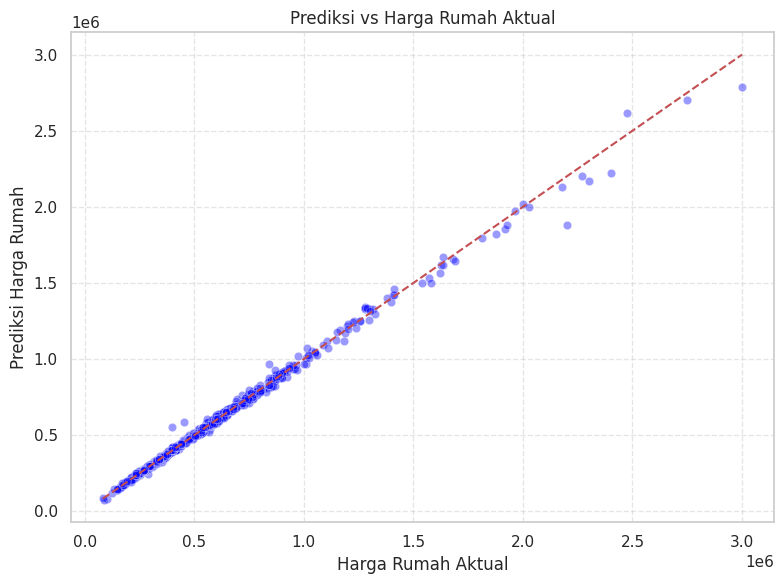

In [32]:
# Scatter Plot: Data Prediksi vs Aktual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Garis referensi
plt.title("Prediksi vs Harga Rumah Aktual")
plt.xlabel("Harga Rumah Aktual")
plt.ylabel("Prediksi Harga Rumah")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

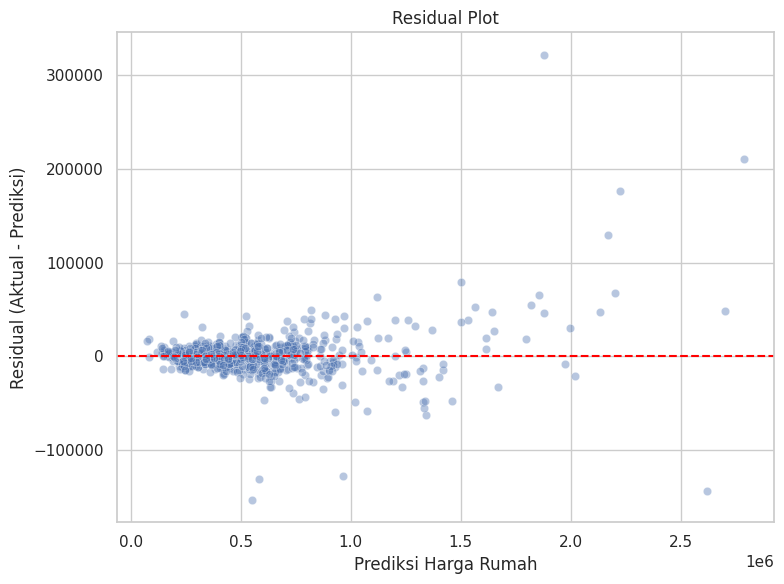

In [33]:
# Residual analysis
residuals = y_test - y_pred_best

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_best, y=residuals, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')
plt.title("Residual Plot")
plt.xlabel("Prediksi Harga Rumah")
plt.ylabel("Residual (Aktual - Prediksi)")
plt.tight_layout()
plt.show()

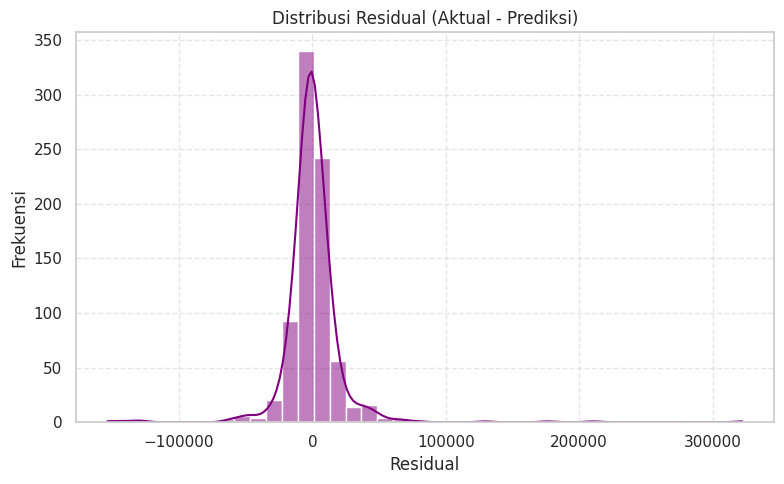

In [34]:
# Distribusi residual
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color='purple')
plt.title("Distribusi Residual (Aktual - Prediksi)")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-35-1541816825.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


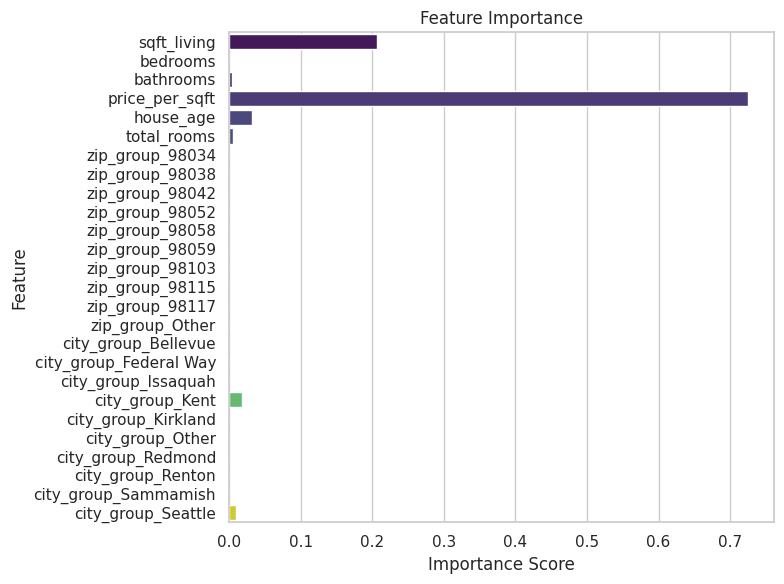

In [35]:
# Feature importance
importances = best_model.feature_importances_
features = X.columns

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validated R²: 0.8124 ± 0.3331


/tmp/ipython-input-37-355451988.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_category', y='abs_error', data=df_eval, palette=palette, showfliers=False)
/tmp/ipython-input-37-355451988.py:15: UserWarning: The palette list has more values (12) than needed (4), which may not be intended.
  sns.boxplot(x='price_category', y='abs_error', data=df_eval, palette=palette, showfliers=False)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 27.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/tmp/i

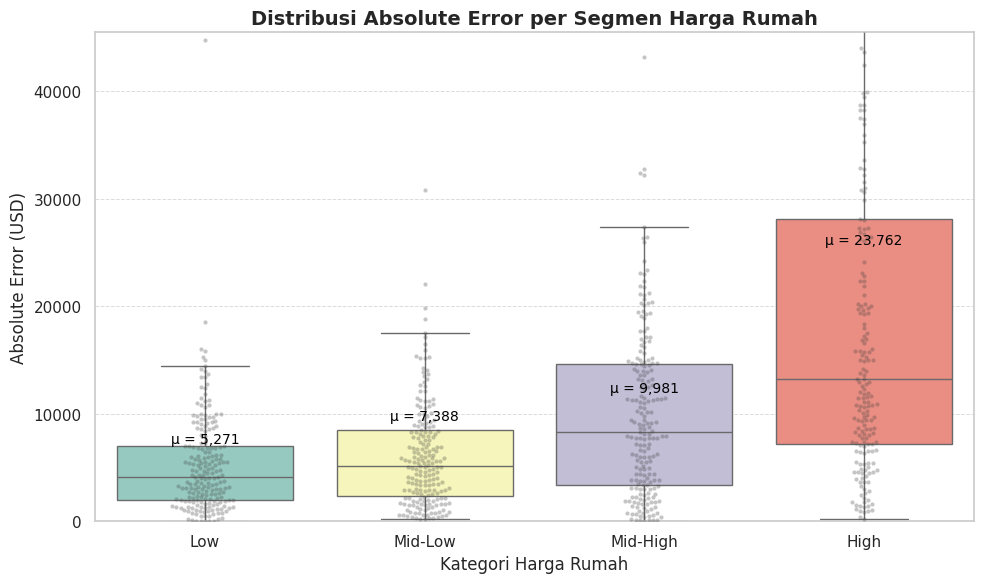

In [37]:
# Cek model lebih akurat di rumah mahal atau murah
df_eval = pd.DataFrame({'actual': y_test, 'predicted': y_pred_best})
df_eval['error'] = df_eval['actual'] - df_eval['predicted']
df_eval['abs_error'] = df_eval['error'].abs()

# Tambahkan kategori harga rumah
df_eval['price_category'] = pd.qcut(df_eval['actual'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

plt.figure(figsize=(10, 6))

# Buat warna berbeda untuk tiap kategori
palette = sns.color_palette("Set3")

# Plot boxplot dengan jitter (swarmplot) untuk menampilkan distribusi aktual
sns.boxplot(x='price_category', y='abs_error', data=df_eval, palette=palette, showfliers=False)
sns.swarmplot(x='price_category', y='abs_error', data=df_eval, color=".25", alpha=0.3, size=3)

plt.title("Distribusi Absolute Error per Segmen Harga Rumah", fontsize=14, weight='bold')
plt.xlabel("Kategori Harga Rumah", fontsize=12)
plt.ylabel("Absolute Error (USD)", fontsize=12)

# Tambahkan garis grid
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Atur batas y agar tidak terlalu tinggi karena outlier
plt.ylim(0, df_eval['abs_error'].quantile(0.95) * 1.2)  # Fokus ke 95% error teratas

# Tambahkan label rata-rata di atas tiap box
grouped = df_eval.groupby('price_category')['abs_error'].mean()
for i, val in enumerate(grouped):
    plt.text(i, val + 2000, f"μ = {int(val):,}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [38]:
import joblib
joblib.dump(best_model, "best_model.datsci")

['best_model.datsci']